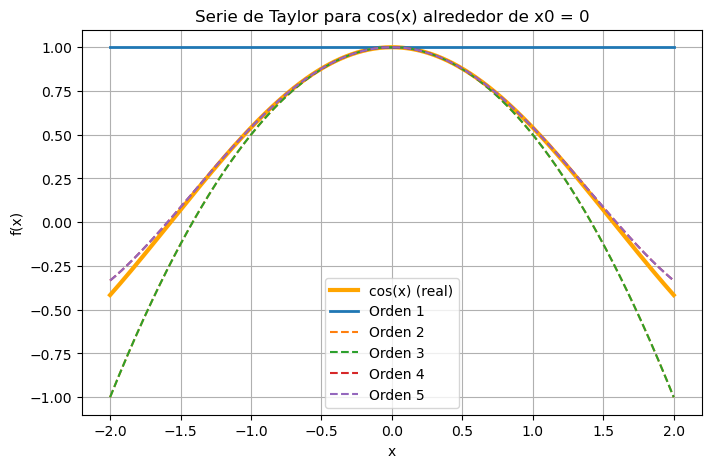

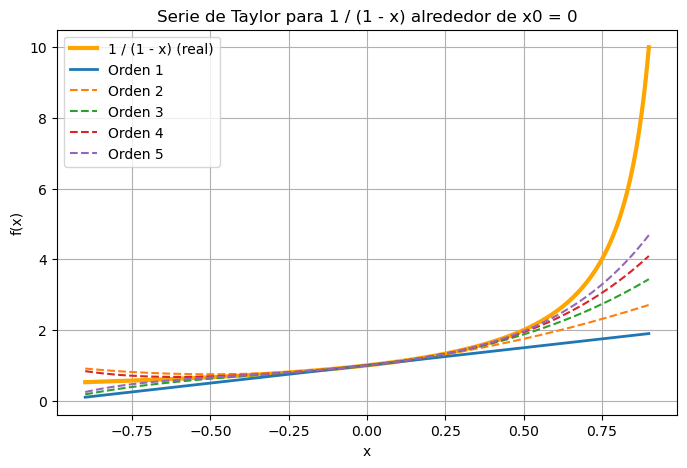

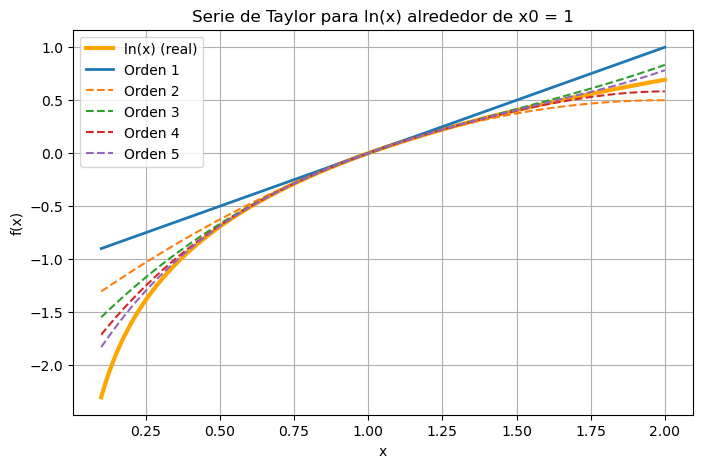

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, series, cos, ln

x = symbols('x')

funcs = [
    (cos(x), 0, "cos(x)", np.linspace(-2, 2, 400)),
    (1 / (1 - x), 0, "1 / (1 - x)", np.linspace(-0.9, 0.9, 400)),
    (ln(x), 1, "ln(x)", np.linspace(0.1, 2, 400))
]

ordenes = range(1, 6)  # Órdenes 1 a 5

# Obtener la lista de colores por defecto de Matplotlib
colores = plt.rcParams['axes.prop_cycle'].by_key()['color']

for f, x0, label, x_vals in funcs:
    plt.figure(figsize=(8, 5))

    # Curva real
    y_exact = [f.evalf(subs={x: val}) for val in x_vals]
    plt.plot(x_vals, y_exact, label=f"{label} (real)", lw=3, color='orange', linestyle='-')

    for idx, n in enumerate(ordenes):
        taylor = series(f, x, x0, n + 1).removeO()
        y_approx = [taylor.evalf(subs={x: val}) for val in x_vals]

        color = colores[idx % len(colores)]  # Ciclar colores si hay más órdenes que colores disponibles

        if n == 1:
            plt.plot(x_vals, y_approx, label=f"Orden {n}", lw=2, linestyle='-', color=color)
        else:
            plt.plot(x_vals, y_approx, label=f"Orden {n}", linestyle='--', color=color)

    plt.title(f"Serie de Taylor para {label} alrededor de x0 = {x0}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()



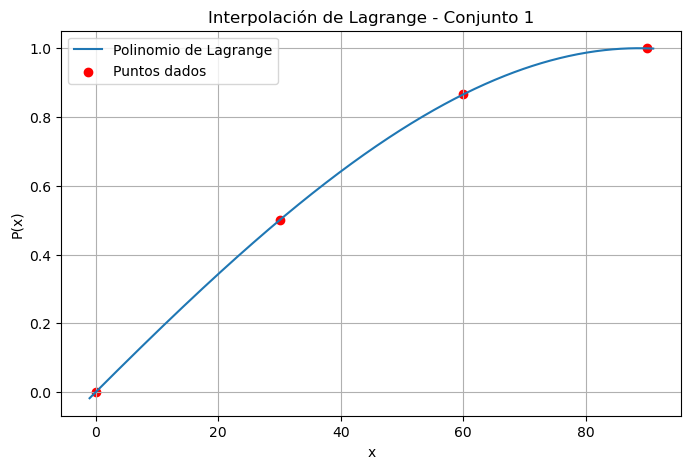

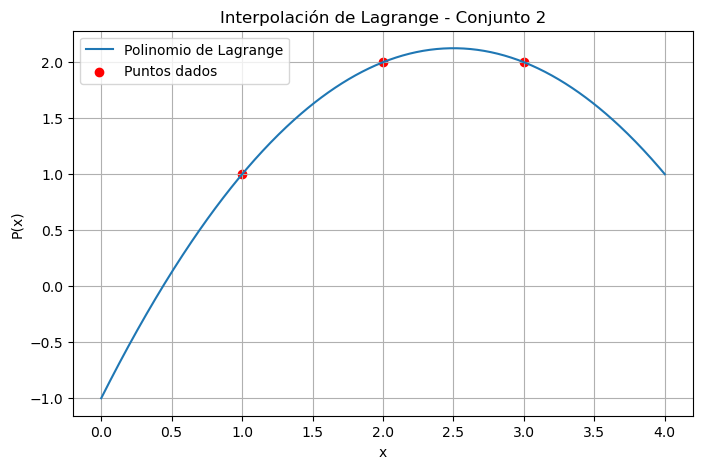

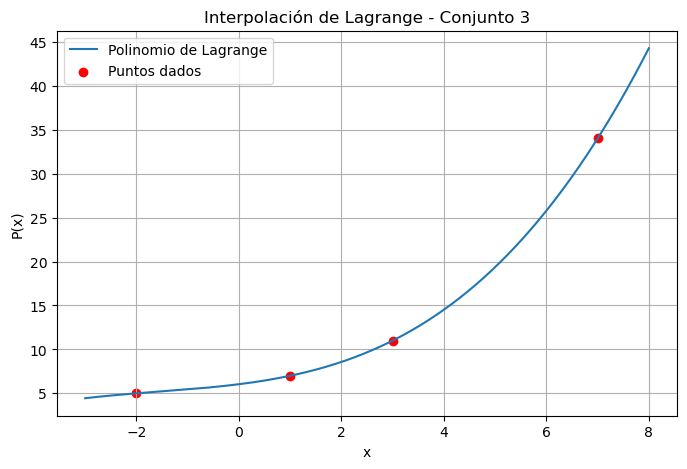

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpol(x_vals, y_vals):
    def L(k, x):
        term = [(x - x_vals[j]) / (x_vals[k] - x_vals[j]) for j in range(len(x_vals)) if j != k]
        return np.prod(term, axis=0)

    def P(x):
        return sum(y_vals[k] * L(k, x) for k in range(len(x_vals)))

    return P

conjuntos = [
    [(0,0), (30,0.5), (60,np.sqrt(3)/2), (90,1)],
    [(1,1), (2,2), (3,2)],
    [(-2,5), (1,7), (3,11), (7,34)]
]

for i, puntos in enumerate(conjuntos):
    x_vals, y_vals = zip(*puntos)
    x_interp = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
    P = lagrange_interpol(x_vals, y_vals)
    y_interp = [P(xi) for xi in x_interp]

    plt.figure(figsize=(8, 5))
    plt.plot(x_interp, y_interp, label="Polinomio de Lagrange")
    plt.scatter(x_vals, y_vals, color='red', label="Puntos dados")
    plt.title(f"Interpolación de Lagrange - Conjunto {i+1}")
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.grid(True)
    plt.legend()
    plt.show()